# Make nice looking maps of spring temperature, discharge and heat flow in the Alps

First, lets import some Python modules that we'll need:

In [1]:
%matplotlib inline 
#%matplotlib notebook
import matplotlib
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import geopandas as gp

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

from lib.mapping_functions import *
import lib.pyGISlib as pyGISlib

#from mpl_toolkits.basemap import Basemap

from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# fix for cartopy error:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

/home/elco/python_scripts/thermal_springs_alps/lib/mapping_functions.py:10: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


## Names of spring database file and elevation data file:

In [2]:
fn = 'data/thermal_springs_alps_with_HF_estimates.csv'

fnr = 'GIS_data/gmted2010_alps_ll.tif'

## Load the thermal spring database for the Alps:

In [3]:
df = pd.read_csv(fn)

# remove empty lines
ind = df['spring location'].isnull()
df = df.loc[ind==False]

# make all data numeric
for col in df.columns:
    if 'spring' not in col and 'type' not in col:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        df[col] = df[col]
        
print('number of springs = %i' % (len(df)))

number of springs = 311


## Some parameters for the map figures:

In [4]:
zs = [df['temperature'].values, 
      np.log10(df['flow_rate'].values)
      ,np.log10(df['H_net_best'].values)]

vlims = [[0, 70.0], [-4.0, -0.25], [2.0, 8.0]]

panel_labels = [['a', 'b'],['c', 'd'], ['a', 'b']]

zlabels = [r'Spring temperature ($^\circ\;C$)', 
           r'Spring discharge ($m^3 s^{-1}$)'
           ,'Log spring heat flow (W)']

zlabels_short = ['temperature', 'discharge', 'heat flow']

fns = ['fig/map_spring_temperatures_Alps.png',
       'fig/map_spring_discharge_Alps.png',
       'fig/map_spring_heat_flow_Alps.png']

# add histograms
add_histos = [True, True, False]

# show heat flow data instead of the default temperature data
#show_HF_data = True

#from mpl_toolkits.basemap import maskoceans
#dem2 = maskoceans(x_raster, y_raster, dem)

xmin, xmax, ymin, ymax = (4.0, 18.0, 42.75, 49.0)

cmap = matplotlib.cm.get_cmap('coolwarm')

proj = ccrs.PlateCarree()

class_ints = [5.0, 0.25, 0.25]

fs_legend = 'small'
label_fs = 'medium'

legend_label = 'Springs with data'
legend_label_nd = 'no data'

hist_ylabel = 'Number of\nsprings'

extent = xmin, xmax, ymin, ymax

long_ticks=[0.0, 5.0, 10.0, 15.0, 20.0]
lat_ticks=[42.0, 44.0, 46.0, 48.0, 50.0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df['H_net_best'].describe()

count    2.100000e+02
mean     5.303127e+05
std      1.189677e+06
min      0.000000e+00
25%      1.206670e+04
50%      8.366415e+04
75%      3.937028e+05
max      9.096029e+06
Name: H_net_best, dtype: float64

## Load DEM

In [6]:
# load dem
print('loading dem')
dem, dimensions, origin, cellsize, nodata, projection = pyGISlib.read_raster_file(fnr)
ny, nx = dem.shape
xcoords = np.arange(origin[0], origin[0] + nx * cellsize[0], cellsize[0])
ycoords = np.arange(origin[1], origin[1] + ny * cellsize[1], cellsize[1])
x_raster, y_raster = np.meshgrid(xcoords, ycoords)

res = 5
x_raster = x_raster[::res, ::res]
y_raster = y_raster[::res, ::res]
dem = dem[::res, ::res]

loading dem


## Load faults shapefile

In [7]:
# load faults shapefile for background
shp_fns = ['GIS_data/faults_alcapadi.shp', 'GIS_data/outline_alps_final.shp']
shps = [gp.read_file(shp_fn) for shp_fn in shp_fns]

shp_colors = ['black', 'white']
shp_lss = ['-', '-']
shp_lws = [1.5, 0.75]

## Organize data

In [8]:
xs, ys, zds = [], [], []

for z in zs:

    x = df['long'].values
    y = df['lat'].values
    
    z[z==np.inf] = np.nan
    z[z==-np.inf] = np.nan
    
    sort_ind = np.argsort(z)
    
    x = x[sort_ind]
    y = y[sort_ind]
    z = z[sort_ind]
    
    xs.append(x)
    ys.append(y)
    zds.append(z)

## Construct the maps

making map fig for variable Spring temperature ($^\circ\;C$)
calculating hillshade
creating color image
tekst:  0 8.480555556 44.77527778
tekst:  1 10.609565 45.600093
[ 8.48055556 10.609565  ] [44.67527778 45.500093  ] [array([70.5, 69.9])]


/home/elco/python_scripts/thermal_springs_alps/lib/mapping_functions.py:257: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/elco/python_scripts/thermal_springs_alps/lib/mapping_functions.py:257: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


saving figure as fig/map_spring_temperatures_Alps.png
done saving
making map fig for variable Spring discharge ($m^3 s^{-1}$)
calculating hillshade
creating color image
tekst:  0 12.02082 46.30346
tekst:  1 14.6061 46.4114
[12.02082 14.6061 ] [46.20346 46.3114 ] [array([-0.65757732, -0.66554625])]
saving figure as fig/map_spring_discharge_Alps.png
done saving
making map fig for variable Log spring heat flow (W)
calculating hillshade
creating color image
tekst:  0 13.825999999999999 46.6886
tekst:  1 7.011839999999999 46.307700000000004
[13.826    7.01184] [46.5886 46.2077] [array([6.95885182, 6.82110333])]
saving figure as fig/map_spring_heat_flow_Alps.png
done saving


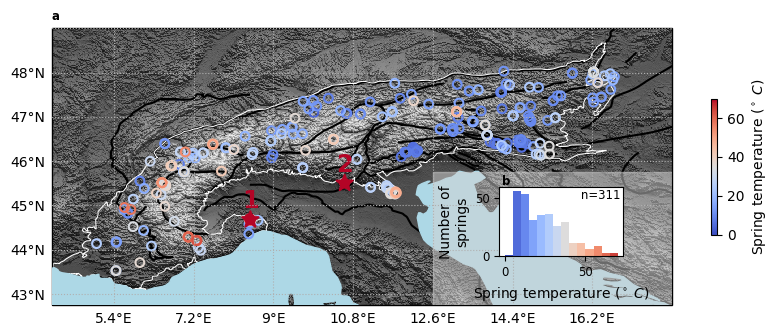

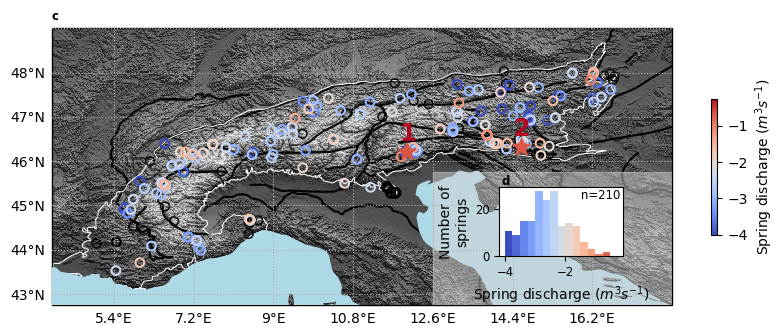

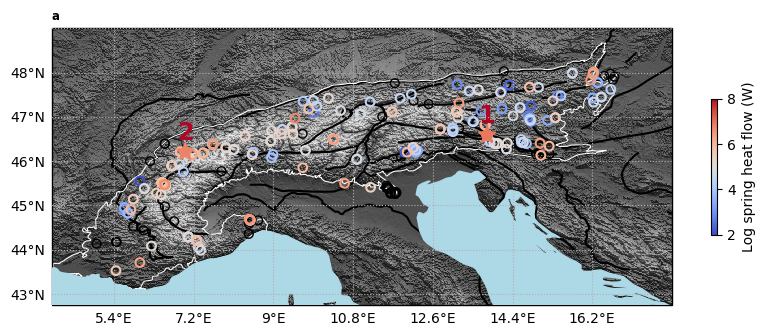

In [9]:
for x, y, z, zlabel, zlabel_short, vlim, add_histo, fn, class_int, panel_label in \
    zip(xs, ys, zds, zlabels, zlabels_short, vlims, add_histos, fns, class_ints, panel_labels):
    
    print('making map fig for variable %s' % zlabel)
    
    fig = make_map_figure(proj, extent, panel_label,
                          x_raster, y_raster, dem, 
                          x, y, z, vlim, class_int,
                          zlabel, hist_ylabel, legend_label, legend_label_nd, 
                          shps, shp_colors, shp_lss, shp_lws, mark_highest_value=True, 
                          add_histo=add_histo)

    print('saving figure as %s' % fn)
    fig.savefig(fn, dpi=200)
    
    print('done saving')

**Fig. caption:** *The figure above shows the temperature of all thermal spings in the database. Blakc circles are springs without any temperature data, thick black lines are major faults (ref alcapi*

## Merge first two images

In [10]:
from PIL import Image

im1 = Image.open(fns[0])
im2 = Image.open(fns[1])

im1c = crop_img(im1)
im2c = crop_img(im2)

combined_img = get_concat_v(im1c, im2c)

fn_out = 'fig/combined_thermal_spring_map.png'

print('saving combined figure as %s' % fn_out)
combined_img.save(fn_out)


saving combined figure as fig/combined_thermal_spring_map.png


## Crop last image

In [11]:
im3 = Image.open(fns[2])
im3c = crop_img(im3)
im3c.save(fns[2])

## Merge heat flow map with HF and thermal footprint histograms

In [12]:
fn_hist = 'fig/contributing_area_HF_and_thermal_footprint.png'

im1 = Image.open(fns[2])
im2 = Image.open(fn_hist)

#im1c = crop_img(im1)
#im2c = crop_img(im2)



combined_img = get_concat_v(im1, im2)

# make transparent pixels white
convert_transp = False
if convert_transp is True:
    combined_img  = combined_img.convert("RGBA")
    d = combined_img.getdata()
    nd = []
    t = []
    for di in d:
        if di[-1] < 255:
            nd.append((di[0], di[1], di[2], 255))
            t.append(di)
        else:
            nd.append(di)

    combined_img.putdata(nd)

fn_out = 'fig/combined_HF_map_and_histograms.png'

print('saving combined figure as %s' % fn_out)
combined_img.save(fn_out)

saving combined figure as fig/combined_HF_map_and_histograms.png


## Some spatial statistics:

In [13]:
bndu = shps[-1].to_crs({'init': 'epsg:32632'})
area_alps = bndu.geometry.area[0]
print('area alps = %0.3e km2' % (area_alps/1e6))

print('number of springs = %i' % (len(df)))

area_per_spring = area_alps / (len(df))
print('area per spring = %0.3f km2' % (area_per_spring/1e6))

radius_springs = np.sqrt(area_per_spring / np.pi)
print('radius per spring = %0.3f km' % (radius_springs/1e3))


area alps = 2.024e+05 km2
number of springs = 311
area per spring = 650.662 km2
radius per spring = 14.391 km


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Stats for the warmest, highest Q and highest W springs

In [14]:
cols_to_show = ['spring location', 'long', 'lat', 
                'spring name', 'temperature', 'flow_rate', 'H_net_best', 'H_net_min', 'H_net_max']

df2 = df.dropna(subset=['temperature'])
df2 = df2.sort_values(by ='temperature')
ix2 = df2.index[-2:]
print('\nstats for highest temperature springs:\n')
print(df2.loc[ix2, cols_to_show])

df3 = df.dropna(subset=['flow_rate'])
df3 = df3.sort_values(by='flow_rate')
ix3 = df3.index[-2:]
print('\nstats for highest discharge springs:\n')
print(df3.loc[ix3,  cols_to_show])


df4 = df.dropna(subset=['H_net_best'])
df4 = df4.sort_values(by='H_net_best')
ix4 = df4.index[-2:]
print('\nstats for highest net HF springs:\n')
print(df4.loc[ix4,  cols_to_show])



stats for highest temperature springs:

             spring location       long        lat   spring name  temperature  \
37  Sirmione (Lago di Garda)  10.609565  45.500093  Fonte Boiola         69.9   
51               Acqui Terme   8.480556  44.675278   La Bollente         70.5   

    flow_rate    H_net_best     H_net_min     H_net_max  
37     0.0110  2.631216e+06  2.495876e+06  2.766557e+06  
51     0.0085  2.060958e+06  2.007668e+06  2.114248e+06  

stats for highest discharge springs:

                                 spring location      long       lat  \
309  Kamniška Bistrica - Kamniško-Savinjske Alps  14.60610  46.31140   
19              Dolomiti Bellunesi National Park  12.02082  46.20346   

    spring name  temperature  flow_rate     H_net_best  H_net_min  \
309         NaN          5.5      0.216       0.000000        0.0   
19     Fontanon          7.9      0.220  829189.170036        0.0   

        H_net_max  
309  4.952332e+06  
19   6.446868e+06  

stats for highes

## Stats for the net heat flux

In [15]:
minmaxs = ['min', 'max']
for mm in minmaxs:
    print('\nH %s stats (W):\n' % mm, df['H_net_%s' %mm].describe())


H min stats (W):
 count    2.100000e+02
mean     4.022716e+05
std      9.466866e+05
min      0.000000e+00
25%      1.054131e+02
50%      3.350809e+04
75%      2.849208e+05
max      7.060914e+06
Name: H_net_min, dtype: float64

H max stats (W):
 count    2.100000e+02
mean     6.940431e+05
std      1.486364e+06
min      1.115274e+02
25%      2.285603e+04
50%      1.197524e+05
75%      6.078460e+05
max      1.113114e+07
Name: H_net_max, dtype: float64
